## Gradient descent example
On a linear 1-dimensional function

There are a few ways to find linear approximation of the dataset - it can be even done analytically.

In this example we present the popular and simple method - <a href="https://en.wikipedia.org/wiki/Stochastic_gradient_descent">Stochastic Gradient Descent (SGD)</a>. This is an iterative approach, in which given a set of input data we try to draw a straight line that with every iteration will have smaller error (error/loss ~~ metric representing summed distance of every point on the plot from that line).

We can define a loss function as $L(\theta)=\sum_{i^{(i)}\in data} (f(x^{(i)}) - y^{(i)})^2$, where <br />
$y^{(i)}$ - value y corresponding to point x <br />
$f(x^{(i)})$ - value of approximating function in point $x^{(i)}$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
plt.rcParams.update({'font.size': 16})
#from matplotlib import rc
#rc('text', usetex=True)

In [3]:
data_df = pd.read_csv('data.csv')
data_df

,country,chocolate consumption (kg/yr/capita),Nobel laureates per 10M population
0,France,6.3,8.0
1,Denmark,8.5,25.1
2,Finland,7.2,7.3
3,Brazil,2.9,0.0
4,Italy,3.8,3.0
5,Poland,3.6,2.9
6,Switzerland,12.0,32.4
7,China,0.7,0.0
8,Belgium,4.2,8.0
9,Japan,1.8,1.0


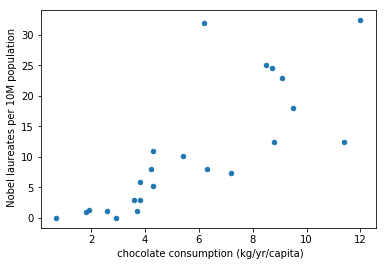

In [4]:
data_df.plot.scatter(1, 2)

In [5]:
data_df = pd.read_csv('data.csv')
xs = data_df.values[:, 1]
ys = data_df.values[:, 2]
ls = data_df.values[:, 0]

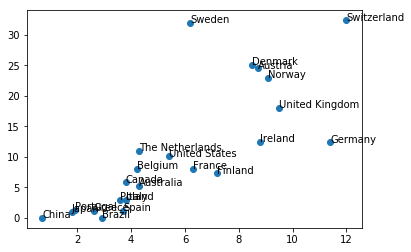

In [8]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)

for i, txt in enumerate(ls):
    ax.annotate(txt, (xs[i], ys[i]))

In [9]:
# helper function to plot loss
def plot_fun(t0, t1, i=0, loss=0):
    data_df.plot.scatter(1, 2, s=40)
    x = 14
    plt.plot([0, x], [t0, f(x)], 'k-', lw=2, label=r'$f($chocolate$)$')
    plt.axis([0, 13, 0, 35])
    plt.legend()
    plt.title('iteration = %02d, loss = %.2f' % (i, loss))
    plt.tight_layout()
    plt.savefig('plots/plot_%03d.png' % (i), dpi=300)

**Excercise 1.** Define linear function f(x) that will  be approximating our dataset and depends on two unknown parameters that we will want to find out. - $\theta_0$ and $\theta_1$:

$f(x)=\theta_0 + \theta_1x$


In [10]:
t0 = 1.  # first parameter (theta_0)
t1 = 0.  # second parameter (theta_1)

def f(x):
    return t0 + t1 * x

**Excercise 2.** Knowing that 

$\frac{\partial L}{\partial \theta_0} = 2\sum_i (f(x^{(i)}) - y^{(i)})$
<br /> and <br />
$\frac{\partial L}{\partial \theta_1} = 2\sum_i (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}$
<br /> Implement the functions to compute those derivatives

In [11]:
import numpy as np

def fun_d_t0(xs, ys):
    return 2 * sum(np.array([f(x) for x in xs]) - ys)

    
def fun_d_t1(xs, ys):
    return 2 * sum((np.array([f(x) for x in xs]) - ys) * xs)

**Excercise 3.** Implement loss function <br />
$L(\theta)=\sum_{i^{(i)}\in data} (f(x^{(i)}) - y^{(i)})^2$

In [12]:
def fun_loss(xs, ys):
    return sum((np.array([f(x) for x in xs]) - ys) ** 2)

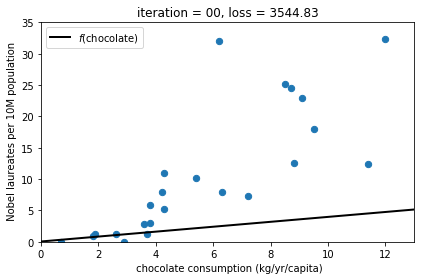

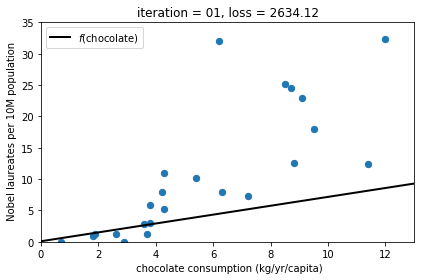

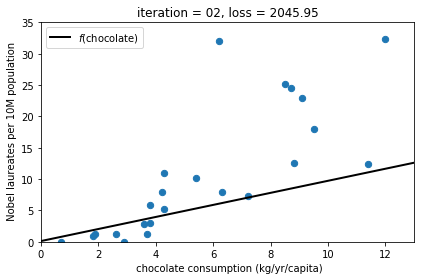

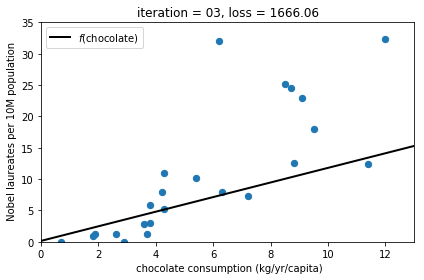

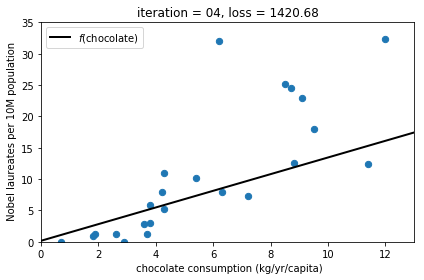

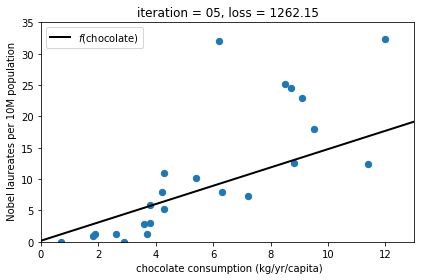

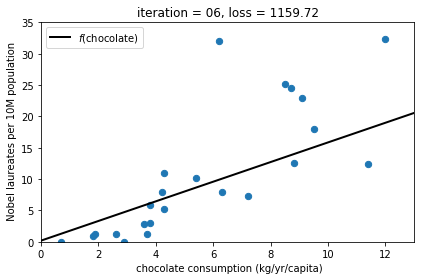

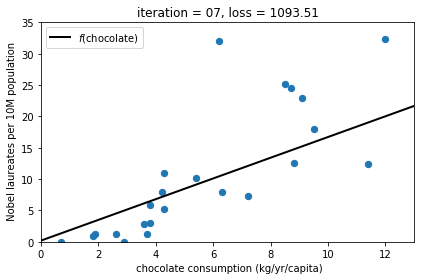

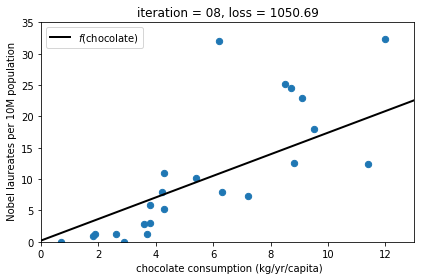

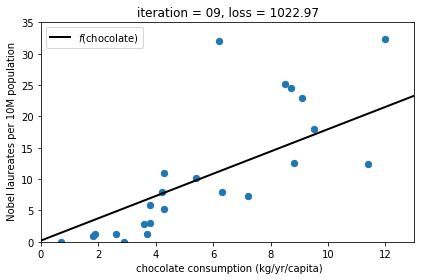

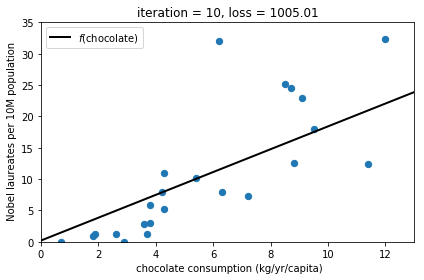

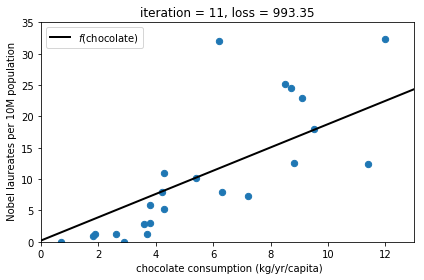

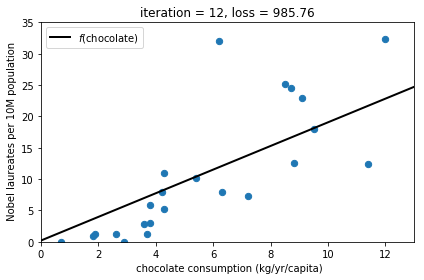

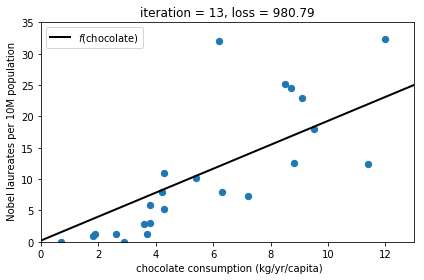

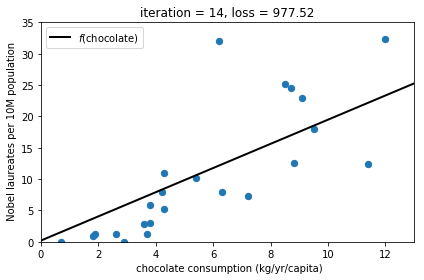

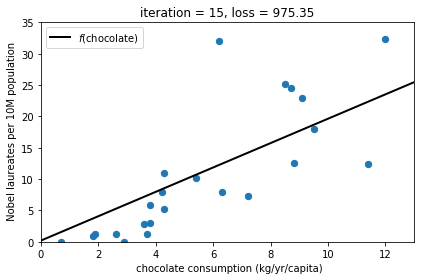

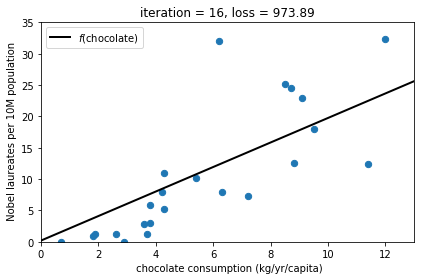

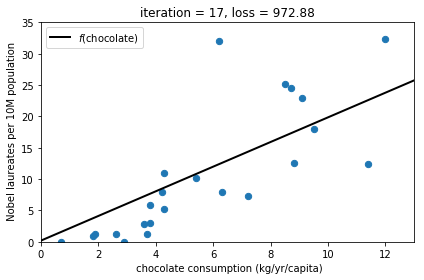

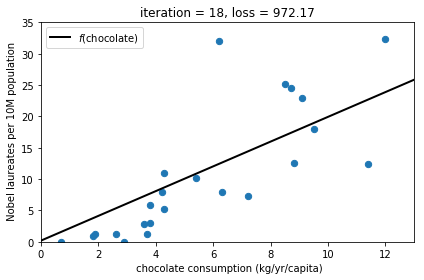

In [18]:
epsilon = 0.0001
t0 = 0.
t1 = 0.
losses = []
for i in range(100):
    if len(losses) < 2 or np.abs(losses[-1] - losses[-2]) > 1:
        d_t0 = fun_d_t0(xs, ys)
        d_t1 = fun_d_t1(xs, ys)

        t0 -= epsilon * d_t0
        t1 -= epsilon * d_t1

        loss = fun_loss(xs, ys)
        losses.append(loss)
        plot_fun(t0, t1, i, loss)
        plt.show()

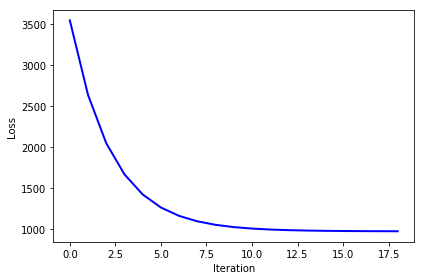

In [19]:
plt.plot(losses, lw=2, color='b')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.tight_layout()
plt.savefig('plots/loss_over_time.png', dpi=300)